In [32]:
# datasets #
# ======== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
titanic_path = "../datasets/titanic/train.csv"
bike_path = "../datasets/bike-sharing-demand/train.csv"
X_iris, y_iris = datasets.load_iris(return_X_y=True, as_frame=True)
df_iris = pd.concat([X_iris, y_iris], axis=1)
X_diab, y_diab = datasets.load_diabetes(return_X_y=True, as_frame=True)
df_diab = pd.concat([X_diab, y_diab], axis=1)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.style.use('fivethirtyeight')
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

# 데이터 파악 & 전처리

## NaN 데이터 처리
1. dropna - 데이터에서 삭제
2. fillna - 다른 값으로 치환
3. boolean으로 삭제

In [9]:
train_data = pd.read_csv(titanic_path)
train_data.isna()
# train_data.info()로 확인할 수도 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### dropna

In [3]:
# 어떤 row에 한 개라도 NaN이 있다면 해당 row를 drop한다.
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
# Age가 NaN일 때만 drop한다.
train_data.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### fillna

In [5]:
# Age의 NaN을 모두 Age의 평균으로 대체한다.
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [6]:
# 생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

# 사망자 나이 평균
mean2 = train_data[train_data['Survived'] == 0]['Age'].mean()

print(mean1, mean2)

# 생존자 NaN 대체
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)

# 사망자 NaN 대체
train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

28.343689655172415 30.62617924528302


0      22.000000
4      35.000000
5      30.626179
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.626179
890    32.000000
Name: Age, Length: 549, dtype: float64

In [38]:
# 실제로 원본 데이터를 수정하려면...
train_data.loc[train_data['Survived'] == 1, 'Age'] = train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived'] == 0, 'Age'] = train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

In [39]:
# 수정사항 확인
train_data[train_data['Age'] == 28.343689655172415]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,18,1,2,"Williams, Mr. Charles Eugene",male,28.34369,0,0,244373,13.0000,NaN,S
119,20,1,3,"Masselmani, Mrs. Fatima",female,28.34369,0,0,2649,7.2250,NaN,C
128,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.34369,0,0,330959,7.8792,NaN,Q
131,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.34369,1,0,PC 17569,146.5208,B78,C
132,33,1,3,"Glynn, Miss. Mary Agatha",female,28.34369,0,0,335677,7.7500,NaN,Q
136,37,1,3,"Mamee, Mr. Hanna",male,28.34369,0,0,2677,7.2292,NaN,C
147,48,1,3,"O'Driscoll, Miss. Bridget",female,28.34369,0,0,14311,7.7500,NaN,Q
155,56,1,1,"Woolner, Mr. Hugh",male,28.34369,0,0,19947,35.5000,C52,S
165,66,1,3,"Moubarek, Master. Gerios",male,28.34369,1,1,2661,15.2458,NaN,C
182,83,1,3,"McDermott, Miss. Brigdet Delia",female,28.34369,0,0,330932,7.7875,NaN,Q


### Simple Imputer

In [20]:
from sklearn.impute import SimpleImputer
data = pd.read_csv(titanic_path)

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imr.fit_transform(data[['Age', 'Fare']].values)

In [21]:
imputed_data[:3]

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ]])

### 결측치 하나 이상인 Row 추출

In [41]:
data[data.isnull().any(axis=1)].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


## (참고) fit ( )과 fit_transform( )의 차이

- fit_transform()은 말그대로 fit()한 다음에 transform()하는 것이다.
    - e.g. StandardScaler에서..
    - fit()은 정규화를 하기 위해 평균μ과 표준편차σ를 계산하는 작업이고,
    - transform()은 정규화 작업을 수행해주는 것이다.
    <br><br>
- 왜 fit_transform()은 training data에 사용하고, transform()은 test data에만 사용하는 걸까?
    - 왜냐면.. fit_transform()으로 train data의 mean과 variance를 학습한다.
    - 그리고 이 fit을 통해 Scaler 객체에 저장된 parameter값은 test data를 scaling하는 데 사용된다.
        - 만약 test data에도 fit_transform()한다면, 우리가 사용하는 모델은 test data도 학습하게 되는 것이다.
        - 우리가 원하는 건 "train data를 통해 데이터의 패턴을 학습하고 test data를 통해 처음 보는 데이터에 대해서도 일반화된 성능을 얻는 것"이다.

## 이상치 처리

- check : histogram or bar plot
-

## 잔차분석

## 다중공선성

## DF Data Types

In [42]:
train_data = pd.read_csv(titanic_path)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### astype

In [43]:
# astype 함수로 데이터 타입 변환
train_data['Pclass'] = train_data['Pclass'].astype(str)

## Group By
- NaN은 제외하여 연산
- count - 데이터 개수
- sum - 데이터의 합
- mean, std, var - 평균, 표준편차, 분산
- min, max - 최소, 최대값

In [46]:
df = pd.read_csv(titanic_path)

In [47]:
# groups: 각 그룹과 그룹에 속한 index를 dict 형태로 표현
class_group = df.groupby('Pclass')

class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [48]:
# groupby mean()
df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [49]:
# 여러개 칼럼일 때
df.groupby(['Pclass', 'Sex']).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [50]:
df.groupby(['Pclass', 'Sex']).mean().loc[(2, 'Age')]

Sex
female    28.722973
male      30.740707
Name: Age, dtype: float64

### Index를 이용한 Groupby
- index가 있는 경우 groupby 함수의 level 사용 가능
    - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가
- set_index: column 데이터를 index 레벨로 변경
- reset_index: index 초기화

In [51]:
df.set_index('Age').groupby(level=0).mean()
# age를 인덱스로 해놓고 groupby level=0 이라는 건
    # age로 groupby하라는 말과 똑같음

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


In [52]:
df.set_index(['Pclass', 'Sex']).groupby(level=[1, 0]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

### Ex) merge / groupby / sort
- 가장 많이 팔린 아이템은?
- 영희가 가장 많이 구매한 아이템은?

In [53]:
customer = pd.DataFrame({'customer_id' : np.arange(6),
                    'name' : ['철수', '영희', '길동', '영수', '수민', '동건'],
                    '나이' : [40, 20, 21, 30, 31, 18]})

customer.head()

,customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30
4,4,수민,31


In [54]:
orders = pd.DataFrame({'customer_id' : [1, 1, 2, 2, 2, 3, 3, 1, 4, 9],
                    'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건', '생수', '수건', '치약', '생수', '케이스'],
                    'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]})
orders.head()

,customer_id,item,quantity
0,1,치약,1
1,1,칫솔,2
2,2,이어폰,1
3,2,헤드셋,1
4,2,수건,3


In [55]:
pd.merge(customer, orders, on='customer_id', how='left').groupby('item').sum()['quantity'].sort_values(ascending=False)

# 가장 많이 팔린 아이템은 수건

item
수건     5.0
생수     4.0
치약     4.0
칫솔     2.0
이어폰    1.0
헤드셋    1.0
Name: quantity, dtype: float64

In [56]:
pd.merge(customer, orders, on='customer_id', how='left').groupby(['name', 'item']).sum().loc['영희', 'quantity']

item
치약    4.0
칫솔    2.0
Name: quantity, dtype: float64

## Aggregate Function
- groupby 결과에 집계함수를 적용하여 그룹별 데이터 확인 가능

In [57]:
df.set_index(['Pclass', 'Sex']).groupby(level=[0, 1]).aggregate([np.mean, np.sum, np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp               Parch                  Fare  \
               amax      mean  sum amax      mean  sum amax        mean   
Pclass Sex                                                                
1      female  63.0  0.553191   52    3  0.457447   43    2  106.125798   
       male    80.0  0.311475   38    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842   37    3  0.605263   46    3   21.970121   
       male    70.0  0.342593   37    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  129    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  173    8  0.224784   78    5   12.661633   

                                    
                     sum      amax  
Pclass Sex                          
1      female  9975.8250  512.3292  
       male    8201.5875  512.3292  
2      female  1669.7292   65.0000  
       male    2132.1125   73.5000  
3      female  2321.1086   69.5500  
       male    4393.5865   69.5500

## Transform Function
- groupby 후 transform 함수를 사용하면 원래의 index를 유지한 상태로 통계함수를 적용한다.
- 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산한다.
- 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉽다.

In [58]:
df = pd.read_csv(titanic_path)

In [59]:
df.groupby('Pclass').transform(np.mean)

# 원본의 index를 유지하면서.. 즉, 원본의 포맷을 유지하면서
# groupby 집계값을 넣을 수 있다.

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


In [60]:
df['Age2'] = df.groupby('Pclass').transform(np.mean)['Age']
df.head()

# Pclass로 groupby된 mean(age)를 'age2'라는 새로운 칼럼으로 쉽게
    # 추가할 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620


In [61]:
df['Age3'] = df.groupby(['Pclass', 'Sex']).transform(np.mean)['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Age3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620,26.507589
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441,34.611765
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620,21.750000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441,34.611765
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620,26.507589


## Pivot and Pivot table
- pivot
    - dataframe의 형태를 변경한다.
    - 인덱스, 칼럼, 데이터로 사용할 칼럼들을 명시한다.
    - 중복되는 entry가 있으면 오류 반환한다.

- pivot_table
    - 기능적으로 pivot과 동일하다.
    - pivot과 차이점은: 중복되는 모호한 값이 있을 경우, aggregation 함수를 사용하여 값을 채운다.

In [62]:
df = pd.DataFrame({
    '지역': ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일': ['월요일', '월요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량': [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률': [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
                  })

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,월요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [63]:
df.pivot_table(index='지역', columns='요일', aggfunc=np.mean)

# 중복되는 entry가 있을 경우 aggregate를 어떻게 할지 명시할 수 있다.

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0   90.0    NaN  90.0  50.0  90.0  75.0   NaN

## DF 병합
- **concat**: axis를 따라서 dataframe 병합 가능
    - 병합하는 column 이름이 서로 같을 때와 다를 때 결과가 다름
- **merge**
    - SQL의 join처럼 특정한 column을 기준으로 병합
    - join 방식은 4가지. how 파라미터로 명시
        - inner: 기본값, 일치하는 값이 있는 경우
        - left: left outer join
        - right: right outer join
        - outer: full outer join

### concat

In [64]:
df1 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})
df2 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})
df3 = pd.DataFrame({'key2' : np.arange(10), 'value2' : np.random.randn(10)})

pd.concat([df1, df2]) # column이 똑같은 2개의 df를 이어붙임
# pd.concat([df1, df2], axis=1)   => column 방향으로 붙임

,key1,value1
0,0,-1.759566
1,1,-0.977879
2,2,-0.327339
3,3,-0.404850
4,4,0.492506
5,5,0.657605
6,6,0.212580
7,7,-0.005435
8,8,-0.276718
9,9,-0.436820


In [65]:
pd.concat([df1, df3])  # column명이 다른 경우 결과

,key1,value1,key2,value2
0,0.0,-1.759566,NaN,NaN
1,1.0,-0.977879,NaN,NaN
2,2.0,-0.327339,NaN,NaN
3,3.0,-0.404850,NaN,NaN
4,4.0,0.492506,NaN,NaN
5,5.0,0.657605,NaN,NaN
6,6.0,0.212580,NaN,NaN
7,7.0,-0.005435,NaN,NaN
8,8.0,-0.276718,NaN,NaN
9,9.0,-0.436820,NaN,NaN


### merge

In [66]:
customer = pd.DataFrame({'customer_id' : np.arange(6),
                    'name' : ['철수', '영희', '길동', '영수', '수민', '동건'],
                    '나이' : [40, 20, 21, 30, 31, 18]})

customer

,customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30
4,4,수민,31
5,5,동건,18


In [67]:
orders = pd.DataFrame({'customer_id' : [1, 1, 2, 2, 2, 3, 3, 1, 4, 9],
                    'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건', '생수', '수건', '치약', '생수', '케이스'],
                    'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]})
orders.head()

,customer_id,item,quantity
0,1,치약,1
1,1,칫솔,2
2,2,이어폰,1
3,2,헤드셋,1
4,2,수건,3


In [68]:
pd.merge(customer, orders, on='customer_id', how='left')

# how = left는 주문 내역이 없는 customer, 즉 on='customer_id'에
    # 해당되지 않는 customer 목록도 반환한다.

,customer_id,name,나이,item,quantity
0,0,철수,40,NaN,NaN
1,1,영희,20,치약,1.0
2,1,영희,20,칫솔,2.0
3,1,영희,20,치약,3.0
4,2,길동,21,이어폰,1.0
5,2,길동,21,헤드셋,1.0
6,2,길동,21,수건,3.0
7,3,영수,30,생수,2.0
8,3,영수,30,수건,2.0
9,4,수민,31,생수,2.0


In [69]:
# index를 기준으로 join하기
cust1 = customer.set_index('customer_id')
order1 = orders.set_index('customer_id')
pd.merge(cust1, order1, left_index=True, right_index=True)

,name,나이,item,quantity
customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,이어폰,1
2,길동,21,헤드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2


## Where

## Mask

## Filter

# Feature Engineering

## 정규화, 표준화

- StandardScaler: 각 특성의 평균을 0 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
- RobustScaler: 특성들이 같은 스케일을 갖게 된다는 통계적 측면에선 비슷하지만, 중간값과 사분위값을 사용한다.
- MinMaxScaler: 모든 특성이 0과 1사이에 위치하도록 데이터를 변경한다.
- Normalizer: 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. (지름이 1인 구에 데이터 포인트를 투영한다.) => 벡터의 길이는 상관없고 데이터의 방향이 중요할 때 많이 사용된다.

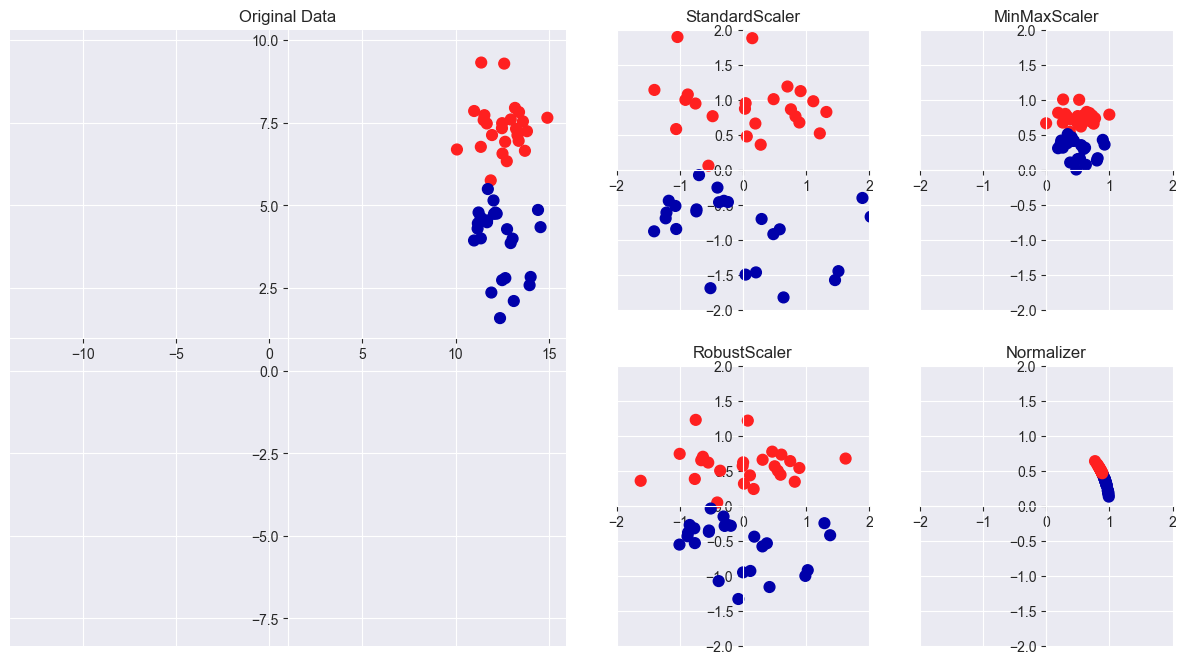

In [3]:
import mglearn
mglearn.plots.plot_scaling()

### 표준화 : Standard Scaler

$$x_i new = \frac{x_i - mean(x)}{stdev(x)}$$


In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
data  = df_iris.copy()
X_data = data.drop('target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_scaled[0:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

### 정규화 : MinMax Scaler

$$x_i new = \frac{x_i - min(x)}{max(x) - min(x)}$$

In [71]:
data = df_iris.copy()
X_data = data.drop('target', axis=1)

scaler = MinMaxScaler()
X_mscaled = scaler.fit_transform(X_data)
X_mscaled[0:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

### 표준화 : Robust Scaler
$$ x_{robust}^{(i)} = \dfrac{x^{(i)} - q_2}{q_3 - q_1}$$

In [72]:
data = df_iris.copy()
X_data = data.drop('target', axis=1)

scaler = RobustScaler()
X_rscaled = scaler.fit_transform(X_data)
X_rscaled[0:3]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333]])

### 정규화 : Normalizer

`Normalizer` 클래스와 `normalize()` 함수는 특성이 아니라 샘플별로 정규화를 수행합니다. 또한 희소 행렬도 처리할 수 있습니다. 기본적으로 샘플의 L2 노름이 1이 되도록 정규화합니다.

In [73]:
from sklearn.preprocessing import Normalizer

data = df_iris.copy()
X_data = data.drop('target', axis=1)

nrm = Normalizer()
iris_normalized = nrm.fit_transform(X_data)
iris_normalized[0:3]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949]])

### (참고) 데이터 전처리 후 SVM 성능 비교

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [79]:
# MinMaxScaler로 전처리 후 속성값 확인하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

print("변환된 후 크기: {}".format(X_train_scaled.shape))
print()
print("스케일 조정 전 특성별 최소값: {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값: {}".format(X_train.max(axis=0)))
print()
print("스케일 조정 후 특성별 최소값: {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)

스케일 조정 전 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 특성별 최대값: [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]

스케일 조정 후 특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [80]:
# 이 데이터에 SVM을 적용하려면 테스트 세트도 변환해야 한다
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값: {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최소값: {}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값: [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
스케일 조정 후 특성별 최소값: [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


In [83]:
# 전처리 전 성능
from sklearn.svm import SVC

svm = SVC(C=100)
svm.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 0.941
테스트 세트 정확도: 0.944


In [84]:
# MinMaxScaler 전처리 후 성능
svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

print("스케일링 후 훈련 세트 정확도: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("스케일링 후 테스트 세트 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일링 후 훈련 세트 정확도: 1.000
스케일링 후 테스트 세트 정확도: 0.965


## PCA
- PCA 알고리즘은 성분1이라고 쓰여있는 분산이 가장 큰 방향을 찾는다.
    - 이 방향(벡터)는 이 성분1에 대한 가장 많은 정보를 담고 있는 방향이다.
- 그 다음 첫번째 방향과 직각인 방향 중에 가장 많은 정보를 담는 방향을 찾는다. (component 2)

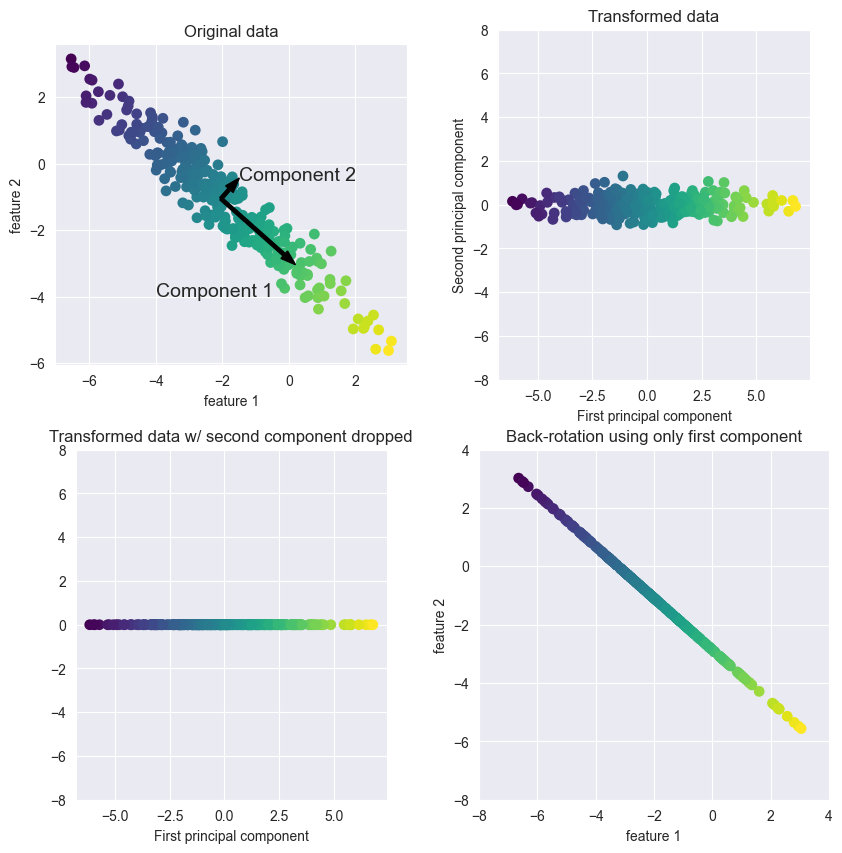

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

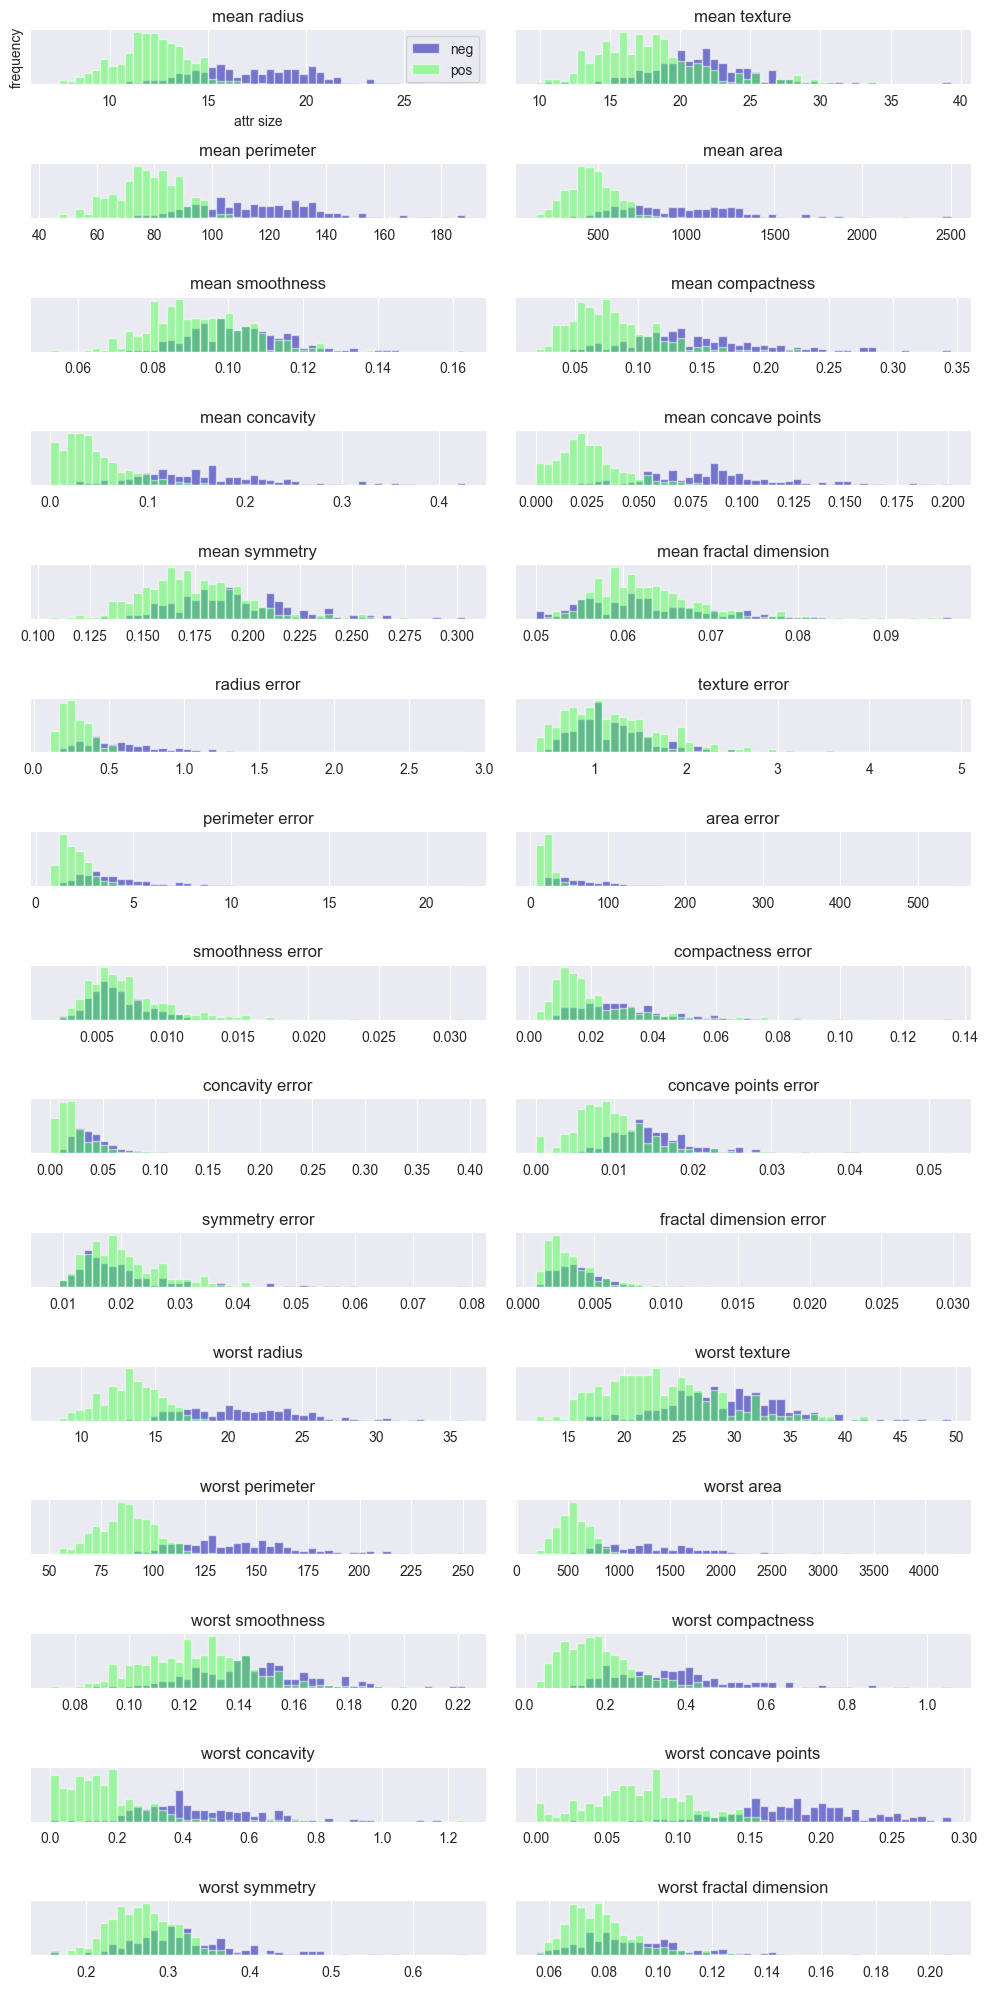

In [4]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg", "pos"], loc="best")
fig.tight_layout()
plt.show()

# !!! 예를 들어...
    # 아래의 worst concave points 특성은 두 히스토그램이 확실히 구분되기 때문에 매우 유용한 특성이다.
    # 그러나.. 이 그래프는 특성 간의 상호작용에 대해선 전혀 알려주지 못한다.

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


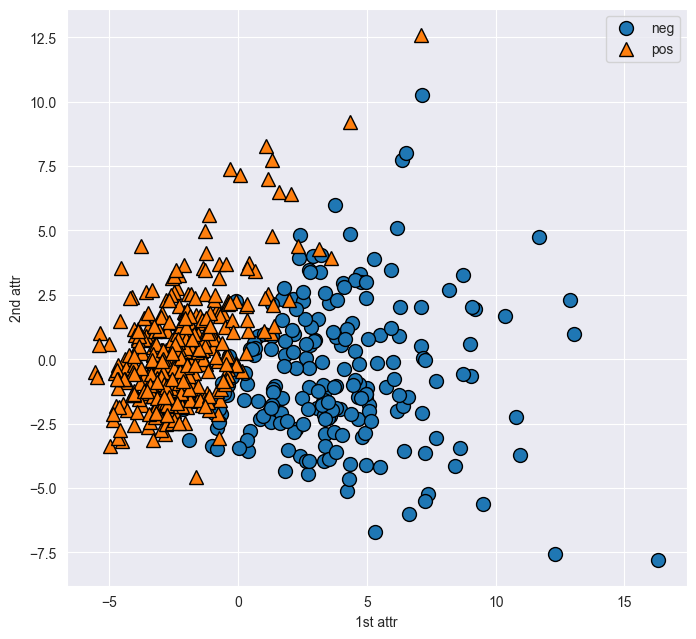

In [5]:
# pca 적용 전 StandardScaler를 적용
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(cancer.data)

# PCA 객체 생성, fit메서드로 주성분 찾고, transform메서드로 데이터를 회전시키고 차원을 축소한다.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 데이터 첫 2개의 주성분만 유지한다.
pca.fit(X_scaled)  # PCA 모델 만들기
X_pca = pca.transform(X_scaled)  # 처음 두 개의 주성분을 사용해 데이터 변환

print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

# principal component 2개를 사용한 산점도 그리기
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['neg', 'pos'], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

# 두 클래스가 2차원 공간에서 꽤 잘 분류된다.
# PCA의 단점은 그래프의 두 축을 해석하기 쉽지 않다는 점이다.
# 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다.


PCA 주성분: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


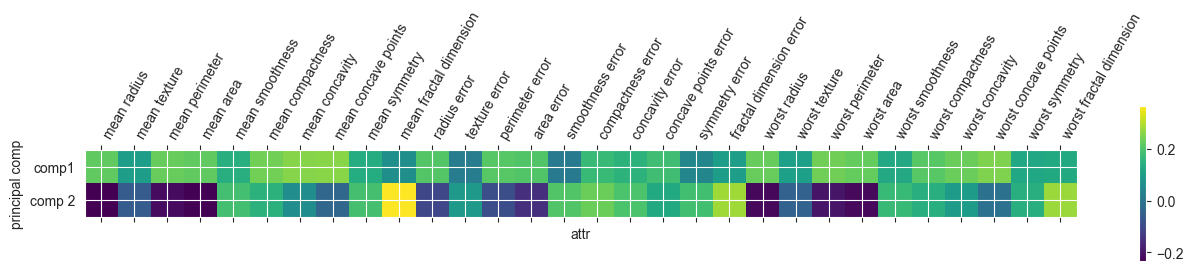

In [6]:
# 주성분 데이터와 주성분 히트맵
print("PCA 주성분: {}".format(pca.components_.shape))
print("PCA 주성분: {}".format(pca.components_))

plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ["comp1","comp 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.xlabel("attr")
plt.ylabel("principal comp")
plt.show()

# 첫번째 주성분의 모든 특성은 부호가 같다. => 모든 특성 사이에 공통의 상호관계가 있다. => 한 특성의 값이 커지면 다른 값들도 높아질 것으로 예상된다.
# 두 번째 주성분의 특성은 부호가 섞여있다. => 2번째 주성분의 축이 가지는 의미는 파악하기 힘들다.

## Feature Regularization

**편향-분산 트레이드오프**<br>

> 일반적으로 높은 분산(variance)는 과대적합(overfitting)에 비례하고, 높은 편향(bias)는 과소적합(underfitting)에 비례한다.<br>

> 머신 러닝 모델에서 **분산**은 모델을 여러 번 훈련했을 때 특정 샘플에 대한 예측의 일관성(또는 변동성)을 측정합니다. 예를 들어 훈련 데이터셋의 일부분을 사용하여 여러 번 훈련하는 경우입니다. 이런 모델은 훈련 데이터의 무작위성에 민감하다고 말할 수 있습니다. 반대로 **편향**은 다른 훈련 데이터셋에서 여러 번 훈련했을 때 예측이 정확한 값에서 얼마나 벗어났는지 측정합니다. 편향은 무작위성이 아니라 구조적인 에러를 나타냅니다.

- 좋은 편향-분산 트레이드오프를 찾는 한 가지 방법은 "규제를 사용하여 모델의 복잡도를 조정하는 것"이다.
- Regularization은 "과도한 파라미터(가중치) 값을 제한하기 위해 추가적인 정보(편향)를 주입하는 개념이다."<br><br>

- 가장 널리 사용되는 형태가 **L2 규제** (lambda는 '규제 하이퍼파라미터')

$L2: \lVert \boldsymbol w \rVert_2^2 = \sum_{j=1}^m w_j^2$

$L1: \lVert \boldsymbol w \rVert_1 = \sum_{j=1}^m \lVert w_j \rVert$<br>

- L1 규제의 특징은..
    - 비용 함수의 포물선과 L1 다이아몬드의 경계가 만나는 최적점이 "축에 가깝게 위치할 가능성이 높다는 것"
    - 그래서 L1 규제는 보통 희소한 특성 벡터를 만든다. (대부분의 특성 가중치가 0이 된다)
    - 관련 없는 특성이 많은 고차원 데이터셋일 경우 이런 희소성이 도움이 될 수 있다.

In [38]:
# L1 규제 사용 예시
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

### Ridge
- L2 규제
- 변수선택 불가능
- 변수간 상관관계 높아도 좋은 성능 유지
- 회귀계수가 0에 가까워짐 / 변수선택을 하는 모델은 아님

In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rr = Ridge(alpha=0.01)
rr.fit(X_iris, y_iris)

rr.coef_

array([-0.11196827, -0.03994795,  0.22904583,  0.60837101])

### Lasso
- L1 규제
- 변수선택 가능
- 변수 선택을 통한 높은 해석력, 낮은 MSE
- 상관성이 높은 변수가 있는 경우 오직 하나의 변수만 선택함

In [42]:
ll = Lasso(alpha=0.01)
ll.fit(X_iris, y_iris)

ll.coef_

array([-0.05973859, -0.        ,  0.2654569 ,  0.47187296])

### ElasticNet
- L1 + L2 규제
- 변수 선택 가능
- 변수간 상관관계와 변수선택을 조합한 규제화로 해석력 좋음
- 상관관계가 큰 변수 동시 선택/제거됌

In [43]:
en = ElasticNet(alpha=0.01)
en.fit(X_iris, y_iris)

en.coef_

array([-0.08695783, -0.01467699,  0.26760436,  0.4925939 ])

## Labelling

### 직접 mapping
- 옷 사이즈, 등급처럼 순서 특성을 가진 범주형 문자열을 바꿀 때는 직접 매핑 함수를 만들어서 레이블 인코딩 해줘야 한다.

In [27]:
data = pd.read_csv(titanic_path)

mapping = {'male': 0,
           'female': 1}
data['Sex'] = data['Sex'].map(mapping)

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [29]:
# Inverse Mapping
inv_mapping = {v: k for k, v in mapping.items()}
data['Sex'] = data['Sex'].map(inv_mapping)

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 함수 & apply

In [44]:
# age 변수 변환하기: 변환 로직을 함수로 만든 후 apply 함수로 적용
import math

def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10  # floor는 '내림' 함수

train_data['Age'].apply(age_categorize)

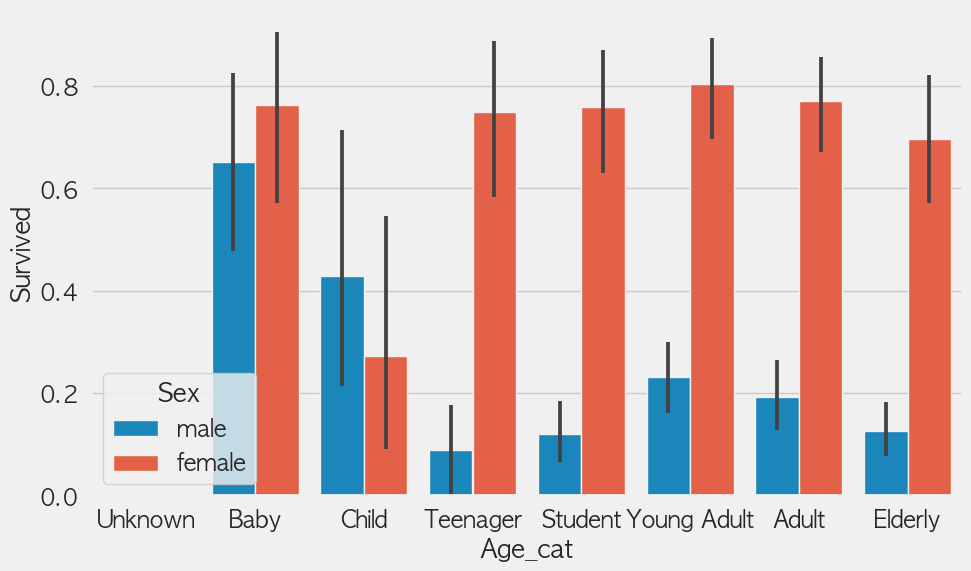

In [34]:
# numeric -> categorical
data = pd.read_csv(titanic_path)

# 나이의 카테고리를 반환하는 함수 정의
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# apply와 lambda 활용
data['Age_cat'] = data['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex',
            data=data, order=group_names);

### One-Hot Encoding
- pd.get_dummies 함수 사용
- 'drop_first' parameter: 첫 번째 카테고리 값 사용하지 않음

In [45]:
train_data = pd.read_csv(titanic_path)

pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked']).head()

```python
>>> corolla = pd.read_csv(~/)
>>> corolla.Fuel_Type.unique()  --> array(['Diesel', 'Petrol', 'CNG'])

dummy_p = np.repeat(0, corolla.shape[0])   #shape[0]은 총 데이터 수
dummy_d = np.repeat(0, corolla.shape[0])
dummy_c = np.repeat(0, corolla.shape[0])

# boolean index 만들어서, dummy_x array에 1 대입
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

dummy_p[p_idx] = 1  # p_idx가 true인 인덱스에 값으로 1 입력
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

# 더미 df 만들기
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# 기존 df에서 Fuel_Type 변수 지우고, 더미 df concat
corolla_ = corolla.drop(['Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), axis=1)
```


### String 처리

In [30]:
data = pd.read_csv(titanic_path)

# 기존 "Cabin" value_counts
display(data['Cabin'].value_counts())

# Cabin의 값을 첫 알파벳 한 글자로 바꿔준다.
data['Cabin'] = data['Cabin'].str[:1]
display(data['Cabin'].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

### (참고) Preprocessing Pipeline

In [37]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 feature 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 위의 함수 한번에 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 데이터 로드
data = pd.read_csv(titanic_path)
data_y = data['Survived']
data_X = data.drop('Survived', axis=1)

data_X = transform_features(data_X)

data_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


## Feature Selection
- 순차특성선택 알고리즘 SBS
- Forward, Backward, Stepwise (#doc_models)
- VIF를 이용한 변수 제거 (#doc_models)

### 순차특성선택 알고리즘 설명

- 특성 선택을 통한 차원축소도 모델 복잡도를 낮추고 과대적합을 피하는 방법 중 하나다.
    - 특히.. 규제를 쓸 수 없는 모델에서 유용하다.
- 차원 축소 기법에는 두 개의 주요 카테고리가 있다.
    - 특성 선택(feature selection): 원본 특성에서 일부를 선택하는 것
    - 특성 추출(feature extraction): 일련의 특성에서 얻은 정보로 새로운 특성을 만드는 것

> - 순차 특성 선택(sequential feature selection)은 '탐욕적 탐색 알고리즘(greedy search algorithm)'으로 초기 $d$차원의 특성 공간을 $k < d$인 $k$차원의 특성 부분 공간으로 축소한다.<br>
> - 전통적 순차특성선택 알고리즘으로 순차 후진 선택(Sequential Backward Selection, SBS)가 있다.

### SBS 구현하기

In [ ]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init_(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        # self.indices_ = (0, 1, 2, ..., 11, 12) * feature 개수

        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_featuers:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)  # 각 feature 조합의 score
                subsets.append(p)  # feature의 조합

            best = np.argmax(scores)  # score 리스트에서 가장 score가 높은 행의 Index 반환
            self.indices_ = subsets[best] # subsets[best] = 가장 점수가 높은 feature 조합  =>  self.indices_가 된다  => 이 self.indices_는  dim - 1개의 feature 조합이고, 이게 다시 FOR문 위로 올라간다.
            self.subsets_.append(self.indices_)  # 이 feature 조합을 self.subsets_에 저장한다
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]  # k개의 feature가 남았을 때의 score는 scores_ 리스트에 마지막으로 입력된 score이다.

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator(fit(X_train[:, indices], y_train))
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test. y_pred)
        return score

## Feature Extraction
- PCA (#doc_models) (#Raschka_2)
- LDA (#Raschka_2)
- Kernel PCA (#Raschka_2)

교차검증 (분류모델 / 회귀모델 모두 사용 가능하다)
- Kfold (#inflearn_ML)  (#Raschka_3)
    - 학습곡선 시각화 (#Raschka_3)
- cross_val_score, gridsearchCV (#inflearn_ML)
- scoring='accuracy'말고 회귀모델 대상으로 어떻게 사용하는지 확인

Class Imbalance
- Resample (#Raschka_3)
- undersampling, oversampling (#note_12-imbalance)
- SMOTE (#note_12-imbalance)